<a href="https://colab.research.google.com/github/subh-775/Machine-Learning-Hub/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
ds=pd.read_csv(r'/content/spam_labelled.csv')
ds

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
ds.isna().sum() # dropping unnamed columns

,0
Category,0
Message,0


In [6]:
#making a column spam or not with labels '0' and '1'
ds['Spam']=ds['Category'].apply(lambda x:1 if x=='spam' else 0)
ds.head(10)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


from matplotlib import pyplot as plt
_df_0['Spam'].plot(kind='hist', bins=20, title='Spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Spam'].plot(kind='line', figsize=(8, 4), title='Spam')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Spam', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

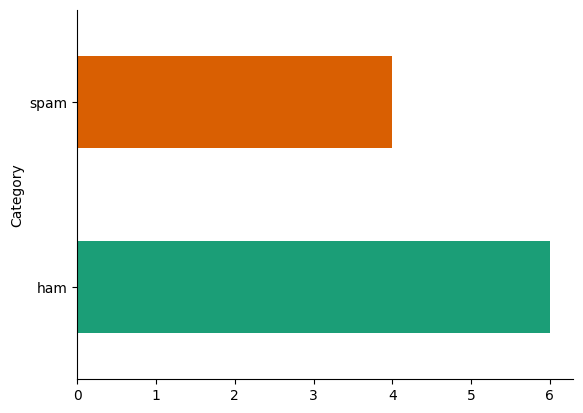

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  #CounterVectorizer Convert the text into matrics
from sklearn.naive_bayes import MultinomialNB  # MultinomialNB is used as data is in discrete form containing '0' and '1'
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
X_train,X_test,y_train,y_test=train_test_split(ds.Message,ds.Spam,test_size=0.25)
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [20]:
model = clf.fit(X_train,y_train)

# Testing

In [12]:
emails=[
    'Dear Sir/Madam, I am interested in internship opportunities in machine learning at your university',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES',
    'Internship offer! Submit your details to be considered for a premium internship program.',
    'Unlock your career! Click here for quick internship approvals. Limited time only!',
    'Hurry! Limited-time offer. Get a 50% discount on all products. Visit [website].'
    ]

In [13]:
clf.predict(emails)

array([0, 0, 1, 0, 1])

## using a seperate unlabelled dataset for testing

In [14]:
dc=pd.read_csv(r"/content/test_unlabelled.csv")
dc.head(5)

,Text
0,"Dear Professor, I am looking for an internship..."
1,Exclusive offer! Get a paid internship by sign...
2,"Hi, I am a 5th-semester student and interested..."
3,Unlock your career! Click here for quick inter...
4,"Hello Professor, I would like to inquire about..."


In [15]:
asc=[]   #empty list for appending csv entries to convert it into a list
arr=[]

for index, row in dc.iterrows():
    asc.append(row.to_list())

for i in range(20):
    print(asc[i],clf.predict(asc[i])) # directly print the label of each row of csv file

#asc

['Dear Professor, I am looking for an internship in AI. Can you guide me with opportunities?'] [0]
['Exclusive offer! Get a paid internship by signing up for our platform!'] [0]
['Hi, I am a 5th-semester student and interested in gaining research experience in your lab.'] [0]
['Unlock your career! Click here for quick internship approvals. Limited time only!'] [0]
['Hello Professor, I would like to inquire about internship possibilities in AI and Data Science.'] [0]
['Act now! Secure your internship position by paying a registration fee today.'] [0]
["Respected Dr. Smith, I'm a 3rd-year student looking for an internship at your institution."] [0]
["Congrats! You've been selected for an exclusive internship. Provide your details to claim."] [1]
["Dear Sir/Madam, I'm interested in internship opportunities in machine learning at your university."] [0]
['Get your dream internship instantly by signing up to our premium membership!'] [1]
['Hello, I came across your profile and would love to 

In [17]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# Accuracy

In [18]:
print(f"Accuracy:",clf.score(X_test,y_test)*100)

Accuracy: 98.1335247666906


In [21]:
# Assuming your trained model is stored in a variable named 'model'

# Save the model as a pickle file
with open('spam_classifier_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'spam_classifier_model.pkl'")


Model saved successfully as 'spam_classifier_model.pkl'
